In [1]:
%%capture
!pip install matplotlib seaborn opinionated

In [1]:
%%capture

import opinionated
import pandas as pd

from matplotlib import pyplot as plt

plt.style.use("opinionated_rc")

In [16]:
df = pd.read_csv("/Users/chenghao/Downloads/bq-results-20230913-203338-1694637256850.csv")

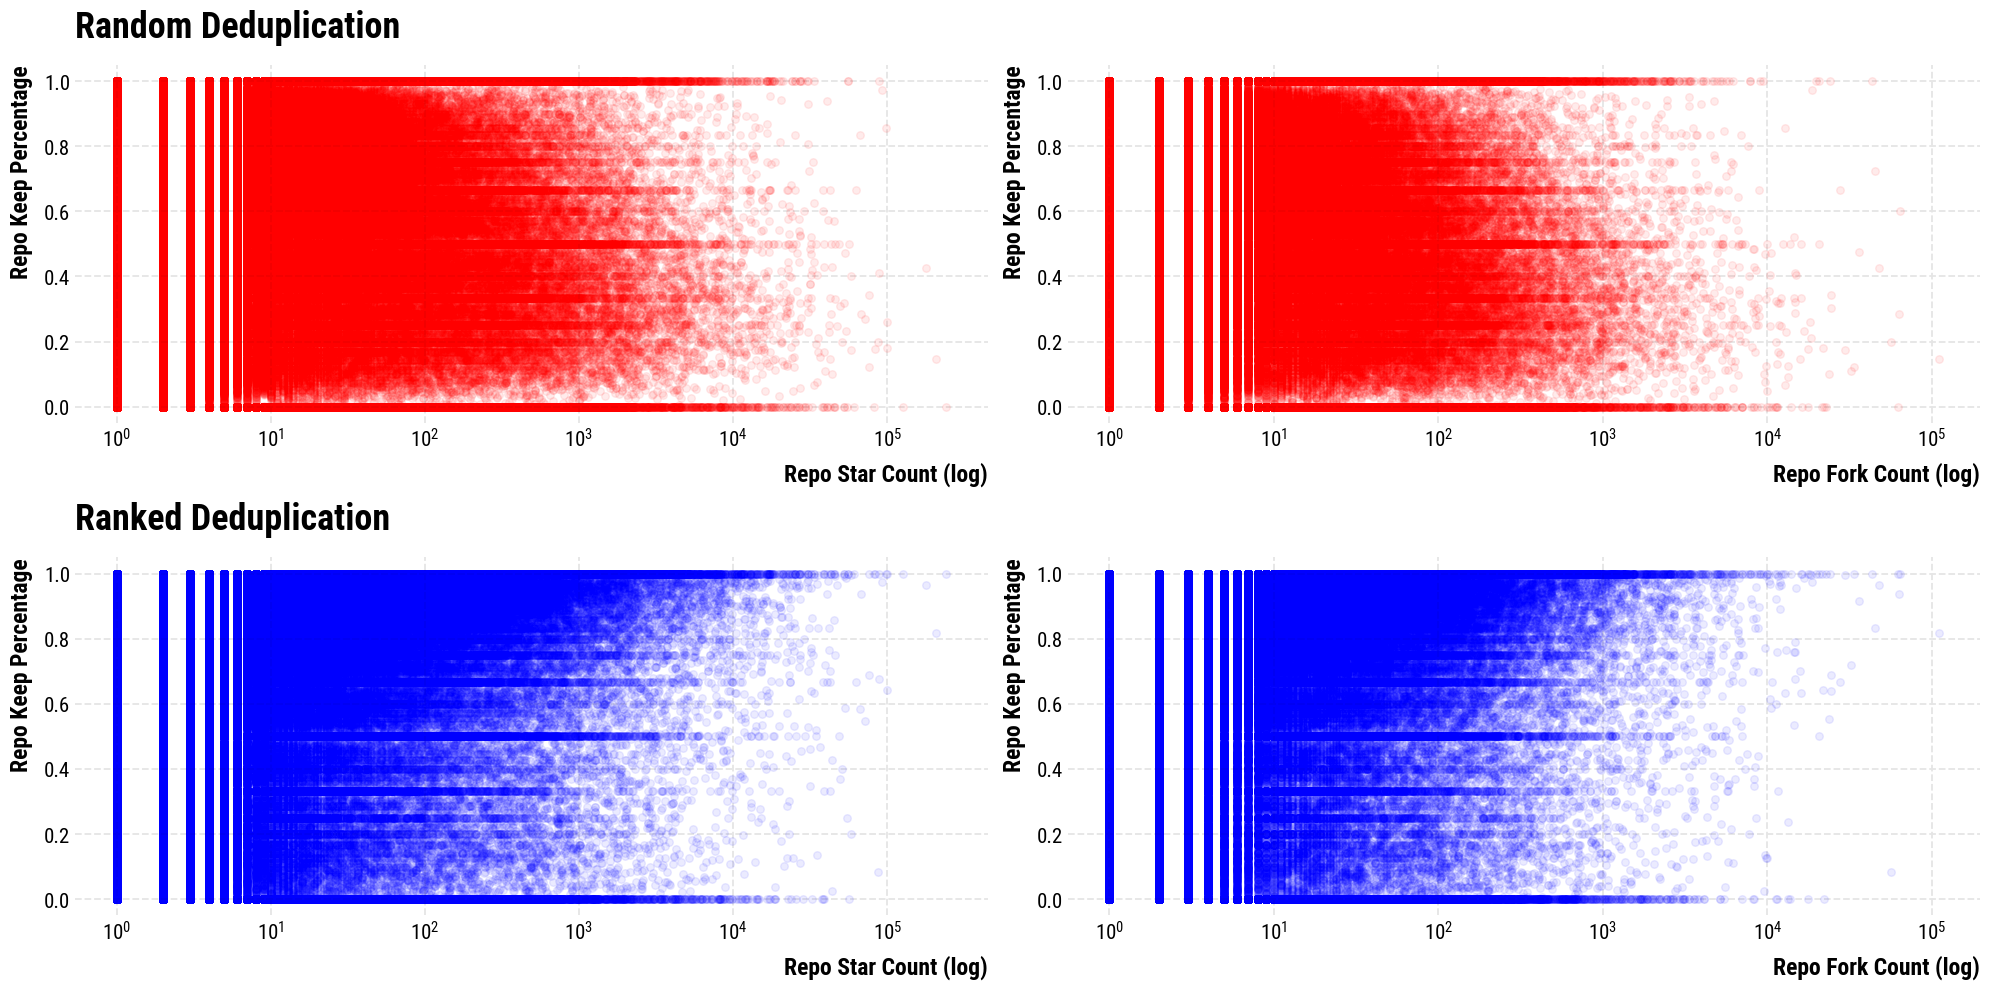

In [17]:

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

def plot(ax, x, y, color, title, x_label, y_label):
    ax.scatter(df[x], df[y], alpha=0.08, s=30, color=color)
    if title:
        ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xscale('log')
    return ax

plot(axes[0][0], "star_count", "random_dedup_keep_percentage", "red", "Random Deduplication", "Repo Star Count (log)", "Repo Keep Percentage")
plot(axes[0][1], "fork_count", "random_dedup_keep_percentage", "red", "", "Repo Fork Count (log)", "Repo Keep Percentage")

plot(axes[1][0], "star_count", "ranked_dedup_keep_percentage", "blue", "Ranked Deduplication", "Repo Star Count (log)", "Repo Keep Percentage")
plot(axes[1][1], "fork_count", "ranked_dedup_keep_percentage", "blue", "", "Repo Fork Count (log)", "Repo Keep Percentage")

plt.tight_layout()

# profiling

In [8]:
import pandas as pd

records = []
with open("./profile.txt", "r") as f:
    for i, line in enumerate(f):
        if i == 0:
            continue
        line = line.strip()
        ncalls, tottime, percall, cumtime, percall, filename_lineno = [p.strip() for p in line.split(" ") if p.strip()]
        records.append({
            "ncalls": int(ncalls),
            "tottime": float(tottime),
            "percall": float(percall),
            "cumtime": float(cumtime),
            "percall": float(percall),
            "filename_lineno": filename_lineno,
        })

df = pd.DataFrame(records)
df

,ncalls,tottime,percall,cumtime,filename_lineno
0,273207,228.950,0.001,361.781,intra_dedup.py:266(<setcomp>)
1,273207,123.498,0.003,852.709,intra_dedup.py:215(generate_hash_values)
2,224109906,99.239,0.000,217.386,intra_dedup.py:190(sha1_hash32)
3,273207,26.196,0.001,243.582,intra_dedup.py:268(<listcomp>)
4,273207,16.167,0.003,869.332,intra_dedup.py:498(<lambda>)
...,...,...,...,...,...
215,230681,0.583,0.000,1.282,intra_dedup.py:354(<lambda>)
216,4253,0.011,0.000,1.426,intra_dedup.py:656(<lambda>)
217,4253,0.002,0.000,1.413,intra_dedup.py:348(process_cluster)
218,4253,0.001,0.000,0.004,intra_dedup.py:657(<lambda>)


In [11]:
cum_df = df.groupby("filename_lineno").sum().sort_values("cumtime", ascending=False)
cum_df

,ncalls,tottime,percall,cumtime
filename_lineno,,,,
intra_dedup.py:498(<lambda>),546414,32.657,0.006,1722.930
intra_dedup.py:215(generate_hash_values),546414,244.634,0.006,1689.295
intra_dedup.py:266(<setcomp>),546414,452.259,0.002,716.247
intra_dedup.py:268(<listcomp>),546414,51.775,0.002,482.874
intra_dedup.py:190(sha1_hash32),448219812,196.975,0.000,431.099
intra_dedup.py:105(large_star_reduce),5536344,7.815,0.000,12.889
intra_dedup.py:79(small_star_reduce),5416676,6.527,0.000,10.263
intra_dedup.py:271(<listcomp>),546414,6.359,0.000,9.222
intra_dedup.py:509(<lambda>),6033768,1.556,0.000,5.132
